In [5]:
# import dependencies
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

csvpath = os.path.join('merge_data', 'merged_data.csv')


In [6]:
df = pd.read_csv(csvpath)
df

FileNotFoundError: [Errno 2] File merge_data/merged_data.csv does not exist: 'merge_data/merged_data.csv'

In [3]:
df = df.loc[df["Income"] < 100000,:]
df.dtypes

Year               int64
StateFIPS          int64
CountyFIPS         int64
Amount             int64
Income             int64
Rate             float64
Income Ratio     float64
LTV              float64
Property Type     object
First              int64
Race               int64
Gender             int64
Age                int64
Credit Score       int64
dtype: object

In [4]:
df = df[["Year", "Amount", "Income", "Race"]]
df = df.groupby(["Year", "Race"]).mean()
df["Amt/Inc Ratio"] = df["Amount"]/df["Income"]
df = df.reset_index("Race")
df = df[["Race", "Amt/Inc Ratio"]]
df.head()





,Race,Amt/Inc Ratio
Year,,
2009,1,2.526480
2009,2,2.257768
2009,3,3.342883
2009,5,2.340100
2009,7,2.351850


In [5]:
bins = [0, 1, 2, 3, 4, 5, 7]
group_names = ["Indigenous", "Asian", "Black", "Pacific Islander", "White", "Not Provided"]
df["Bins"] = pd.cut(df["Race"], bins, labels=group_names, include_lowest=True)
df = df[["Amt/Inc Ratio", "Bins"]]
df.head()

,Amt/Inc Ratio,Bins
Year,,
2009,2.526480,Indigenous
2009,2.257768,Asian
2009,3.342883,Black
2009,2.340100,White
2009,2.351850,Not Provided


Text(0.5, 0, 'Year')

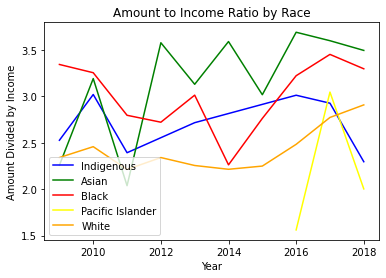

In [11]:
indig, = plt.plot(df.loc[df["Bins"]=="Indigenous", ["Amt/Inc Ratio"]], color="blue", label="Indigenous")
asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Amt/Inc Ratio"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Amt/Inc Ratio"]], color="red", label="Black")
pi, = plt.plot(df.loc[df["Bins"]=="Pacific Islander", ["Amt/Inc Ratio"]], color="yellow", label="Pacific Islander")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Amt/Inc Ratio"]], color="orange", label="White")
plt.legend(handles=[indig, asian, black, pi, white], loc="best")
plt.title("Amount to Income Ratio by Race")
plt.ylabel("Amount Divided by Income")
plt.xlabel("Year")


In [9]:
indig, = plt.bar(df.loc[df["Bins"]=="Indigenous", ["Amt/Inc Ratio"]], color="blue", label="Indigenous")
asian, = plt.bar(df.loc[df["Bins"]=="Asian", ["Amt/Inc Ratio"]], color="green", label="Asian")
black, = plt.bar(df.loc[df["Bins"]=="Black", ["Amt/Inc Ratio"]], color="red", label="Black")
pi, = plt.bar(df.loc[df["Bins"]=="Pacific Islander", ["Amt/Inc Ratio"]], color="yellow", label="Pacific Islander")
white, = plt.bar(df.loc[df["Bins"]=="White", ["Amt/Inc Ratio"]], color="orange", label="White")
np, = plt.bar(df.loc[df["Bins"]=="Not Provided", ["Amt/Inc Ratio"]], color="black", label="Not Provided")
plt.legend(handles=[indig, asian, black, pi, white, np], loc="best")
plt.title("Amount to Income Ratio by Race")
plt.ylabel("Amount Divided by Income")
plt.xlabel("Year")



TypeError: bar() missing 1 required positional argument: 'height'

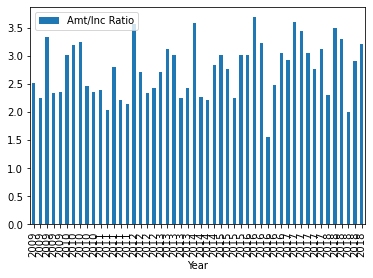

In [12]:
df.plot(kind="bar")